In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import numpy as np
import math as m
import statistics as st
import random
n=116
df = pd.read_csv('Выборка Блохина.csv', delimiter=';')
mean_y=89.0252463054187
mean_x=10.843043995243757
sy=2521.12197188201
sx=10.937331334332836
viborka=[(df["The diameter of pizza in inch"]), (df["pizzaPrice_rupiah"])]

In [16]:
def normalize(df):
    norm_viborka=[]
    for i in range(0,116) :
        xi = (viborka[0][i]-mean_x)/sx
        yi = (viborka[1][i]-mean_y)/sy
        norm_viborka.append([xi,yi])
    return norm_viborka


In [17]:
def make_plot(centroids, cluster):
    X1=np.array(normalize(df))
    centroids=np.array(centroids)
    plt.figure(figsize=(10, 7))      
    scat = sns.scatterplot(X1[:,0],X1[:,1], hue=cluster)
    sns.scatterplot(centroids[:,0], centroids[:, 1], s=250,marker='*', color='g')
    for index,coordinate in enumerate(centroids):
        plt.text(coordinate[0], coordinate[1],index)
    plt.xlabel('The diameter of pizza in inch')
    plt.ylabel('pizzaPrice_rupiah')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [13]:
def get_random_object(norm_viborka):
    return random.choice(norm_viborka)

In [5]:
def get_neighbour_objects(current_object,R, norm_viborka):
    neighbour_objects=[]
  
    for i in range(0,len(norm_viborka)):
        if (np.sqrt((norm_viborka[i][0]-current_object[0])**2 + (norm_viborka[i][1]-current_object[1])**2)<=R):
            neighbour_objects.append(norm_viborka[i])
            
    return neighbour_objects

In [6]:
def center_of_objects(neighbour_objects):
    sum_x=0
    sum_y=0
    for i in range(0, len(neighbour_objects)):
        sum_x+=neighbour_objects[i][0]
        sum_y+=neighbour_objects[i][1]
    center=[sum_x/len(neighbour_objects),sum_y/len(neighbour_objects)]
    return center

In [26]:
def delete_objects(neighbour_objects,norm_viborka):
    for item in norm_viborka:
        for element in neighbour_objects:

            if item == element:
                norm_viborka.remove(item)
                #print(item)
    #print("-----------------------------")
           
    return norm_viborka

In [27]:
def FOREL(R,norm_viborka):
    clusters=[]
    centers=[]
    graph=[]
    u=0
    cl=normalize(df);
    while(len(norm_viborka)!=0) :
        current_object=get_random_object(norm_viborka)
        neighbour_objects= get_neighbour_objects(current_object,R, norm_viborka)  

        center_object = center_of_objects(neighbour_objects)
        while (center_object != current_object):  #пока центр тяжести не стабилизируется 
            current_object = center_object; 
            neighbour_objects= get_neighbour_objects(current_object,R,norm_viborka)
            center_object = center_of_objects(neighbour_objects) 

        clusters.append(neighbour_objects)
        centers.append(center_object)
        #print(neighbour_objects[0][1])

        for i in range(0,len(neighbour_objects)):
            #print(neighbour_objects[i][0],neighbour_objects[i][1])
            for j in range(0,len(cl)):
                #print(cl[j][0],cl[j][1])
                if (cl[j]==neighbour_objects[i]):
                    #print(cl[j], neighbour_objects[i],u)
                    cl[j]=u
        u+=1
        ##print("\n1",norm_viborka)
        norm_viborka=delete_objects(neighbour_objects,norm_viborka)
        #print("\n2",norm_viborka)
        #print("LENGHT",len(norm_viborka))
    
    for k in clusters:
        print("Cluster", k,'\n\n') 
    print(cl)
    make_plot(centers,cl)

    

Cluster [[0.47150039137685235, 0.012286098824270187], [0.28864042866164236, 0.026168806757624404], [0.47150039137685235, 0.00831961084331184], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.47150039137685235, 0.00831961084331184], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.47150039137685235, 0.00831961084331184], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.28864042866164236, 0.009906206035695178], [0.10578046594643241, -0.01706591223482158], [0.28864042866164236, -0.006753043484329879], [0.10578046594643241, -0.01587596584053408], [0.10578046594643241, 0.0027665276699701535], [0.10578046594643241, -0.007942989878617385], [0.28864042866164236, 0.0015765812756826493], [0.10578046594643241, -0.005563097090042376], [0.10578046594643241, 0.01347604521855769], [0.10578046594643241, -0.01706591223482158], [0.28864042866164236, -0.00675304

C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


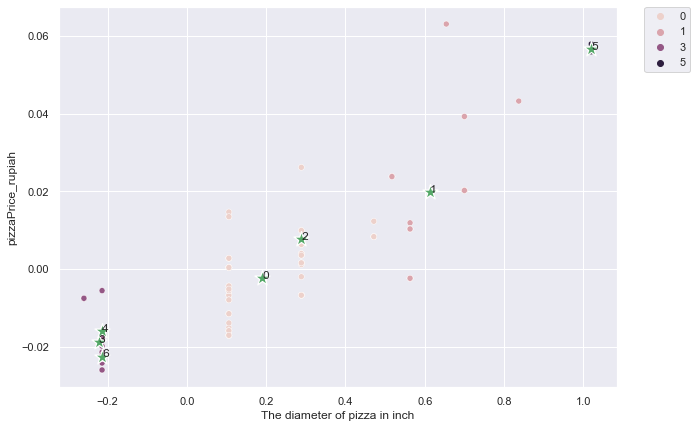

In [28]:
R=0.3 #ширина поиска локальных сгущений - входной параметр алгоритма 
#clusterisation_not_finished(); все ли объекты кластеризованы 
#get_random_object(); #возвращает произвольный некластеризованный объект 
#get_neighbour_objects(type *object); #возвращает массив объектов, расположенных на расстоянии <= R от текущего 
#center_of_objects(type *mass_of_objects); #возвращает центр тяжести указанных объектов 
#delete_objects(type *mass_of_objects); #удаляет указанные объекты из выборки (мы их уже кластеризовали) 
norm_viborka=normalize(df)
FOREL(R,norm_viborka)

Cluster [[0.47150039137685235, 0.012286098824270187], [0.28864042866164236, 0.026168806757624404], [0.47150039137685235, 0.00831961084331184], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.47150039137685235, 0.00831961084331184], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.47150039137685235, 0.00831961084331184], [0.10578046594643241, 0.00038663488139514514], [0.10578046594643241, 0.00038663488139514514], [0.28864042866164236, 0.009906206035695178], [0.10578046594643241, -0.01706591223482158], [0.28864042866164236, -0.006753043484329879], [0.10578046594643241, -0.01587596584053408], [0.10578046594643241, 0.0027665276699701535], [0.10578046594643241, -0.007942989878617385], [0.28864042866164236, 0.0015765812756826493], [0.10578046594643241, -0.005563097090042376], [0.10578046594643241, 0.01347604521855769], [0.10578046594643241, -0.01706591223482158], [0.28864042866164236, -0.00675304

C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


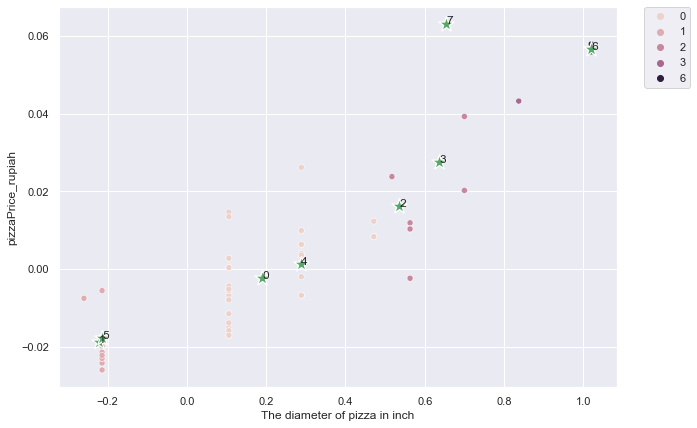

In [11]:
R=0.3-0.00001
norm_viborka=normalize(df)
FOREL(R,norm_viborka)

Cluster [[-0.25993945948398756, -0.007546341080521549], [-0.25993945948398756, -0.007546341080521549], [-0.25993945948398756, -0.007546341080521549], [-0.21422446880518503, -0.025990510191977862], [-0.21422446880518503, -0.023015644206259102], [-0.21422446880518503, -0.022222346610067435], [-0.21422446880518503, -0.005563097090042376], [-0.21422446880518503, -0.019842453821492426], [-0.21422446880518503, -0.017859209831013252], [-0.21422446880518503, -0.019842453821492426], [-0.21422446880518503, -0.021429049013875764], [-0.21422446880518503, -0.021429049013875764], [-0.21422446880518503, -0.017859209831013252], [-0.21422446880518503, -0.024205590600546608], [-0.21422446880518503, -0.019842453821492426], [-0.21422446880518503, -0.021429049013875764], [-0.21422446880518503, -0.02261899540816327], [-0.25993945948398756, -0.007546341080521549], [-0.21422446880518503, -0.025990510191977862], [-0.21422446880518503, -0.023015644206259102], [-0.21422446880518503, -0.025990510191977862], [-0.2

C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\snt_a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


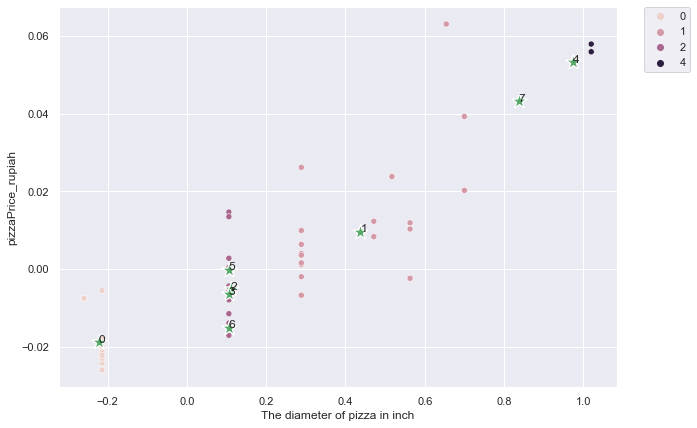

In [12]:
R=0.3+0.00001
norm_viborka=normalize(df)
FOREL(R,norm_viborka)